# NBA One Possession Fouling Analysis - EDA

## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.options.display.max_columns = None

In [58]:
new_take_foul_games = pd.read_csv('C:/Users/kevin/Downloads/simplified take foul games.csv')
new_no_take_foul = pd.read_csv('C:/Users/kevin/Downloads/simplified no take foul games.csv')
new_winning_take_foul = pd.read_csv('C:/Users/kevin/Downloads/simplified winning take foul games.csv')
new_no_win_takefoul = pd.read_csv('C:/Users/kevin/Downloads/simplified no winning take foul games.csv')

In [4]:
new_take_foul_games.head()

,URL,GameType,Location,Date,Time,WinningTeam,Quarter,SecLeft,AwayTeam,AwayPlay,AwayScore,HomeTeam,HomePlay,HomeScore,Shooter,ShotType,ShotOutcome,ShotDist,Assister,Blocker,FoulType,Fouler,Fouled,Rebounder,ReboundType,ViolationPlayer,ViolationType,TimeoutTeam,FreeThrowShooter,FreeThrowOutcome,FreeThrowNum,EnterGame,LeaveGame,TurnoverPlayer,TurnoverType,TurnoverCause,TurnoverCauser,JumpballAwayPlayer,JumpballHomePlayer,JumpballPoss,score_diff,take_foul,SecsLeft,win
0,/boxscores/201511220NOP.html,regular,Smoothie King Center New Orleans Louisiana,November 22 2015,6:00 PM,NOP,4,32,PHO,Turnover by E. Bledsoe (bad pass; steal by E. ...,109,NOP,Personal block foul by B. Knight (drawn by E. ...,112,P. Tucker - tuckepj01,3-pt jump shot,make,24.0,M. Teletović - teletmi01,A. Davis - davisan02,personal block,B. Knight - knighbr03,E. Gordon - gordoer01,I. Smith - smithis01,defensive,NaN,NaN,PHO,I. Smith - smithis01,make,1 of 2,L. Babbitt - babbilu01,A. Gee - geeal01,E. Bledsoe - bledser01,bad pass,steal,E. Gordon - gordoer01,NaN,NaN,NaN,3,True,30.0,0
1,/boxscores/201601290MIL.html,regular,BMO Harris Bradley Center Milwaukee Wisconsin,January 29 2016,8:00 PM,MIA,4,29,MIA,Personal take foul by G. Antetokounmpo (drawn ...,103,MIL,Turnover by G. Antetokounmpo (lost ball; steal...,101,K. Middleton - middlkh01,3-pt jump shot,miss,27.0,NaN,NaN,personal take,G. Antetokounmpo - antetgi01,D. Wade - wadedw01,M. Carter-Williams - cartemi01,defensive,NaN,NaN,MIL,D. Wade - wadedw01,make,1 of 2,J. Bayless - bayleje01,J. Parker - parkeja01,G. Antetokounmpo - antetgi01,lost ball,steal,D. Wade - wadedw01,NaN,NaN,NaN,2,True,29.0,0
2,/boxscores/201702060NOP.html,regular,Smoothie King Center New Orleans Louisiana,February 6 2017,8:00 PM,NOP,4,31,PHO,T. Warren misses 2-pt jump shot from 5 ft,103,NOP,Defensive rebound by A. Davis,105,T. Warren - warretj01,2-pt jump shot,miss,5.0,NaN,J. Holiday - holidjr01,personal,P. Tucker - tuckepj01,A. Davis - davisan02,A. Davis - davisan02,defensive,NaN,NaN,PHO,A. Davis - davisan02,make,1 of 2,D. Cunningham - cunnida01,B. Hield - hieldbu01,T. Warren - warretj01,bad pass,steal,D. Cunningham - cunnida01,B. Hield - hieldbu01,P. Tucker - tuckepj01,A. Davis - davisan02,2,True,27.0,0
3,/boxscores/201712030NYK.html,regular,Madison Square Garden (IV) New York New York,December 3 2017,3:30 PM,ORL,4,28,ORL,Personal take foul by J. Jack (drawn by A. Gor...,99,NYK,J. Jack makes 3-pt jump shot from 26 ft,96,J. Jack - jackja01,3-pt jump shot,make,26.0,NaN,NaN,personal take,J. Jack - jackja01,A. Gordon - gordoaa01,NaN,NaN,NaN,NaN,ORL,E. Fournier - fournev01,make,1 of 2,D. Augustin - augusdj01,E. Payton - paytoel01,K. O'Quinn - oquinky01,bad pass,NaN,NaN,NaN,NaN,NaN,3,True,25.0,0
4,/boxscores/201801300WAS.html,regular,Capital One Arena Washington District of Columbia,January 30 2018,7:00 PM,WAS,4,31,OKC,C. Anthony misses 2-pt jump shot from 14 ft,96,WAS,Defensive rebound by O. Porter,98,C. Anthony - anthoca01,2-pt jump shot,miss,14.0,NaN,NaN,personal take,S. Adams - adamsst01,O. Porter - porteot01,O. Porter - porteot01,defensive,NaN,NaN,OKC,O. Porter - porteot01,make,1 of 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,True,28.0,0


## Fouling Down One Possession

Looks like teams have identified the 29 second mark as the cutoff in which they may need to foul to get the ball back.

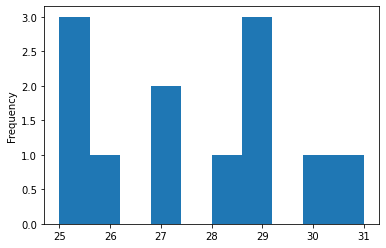

In [6]:
new_take_foul_games['SecsLeft'].plot(kind='hist')

As expected when there is more than 30 seconds, more teams are willing to just wait and play out defense.

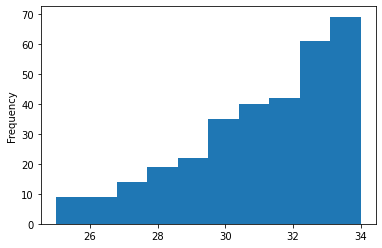

In [9]:
new_no_take_foul['SecLeft'].plot(kind='hist')

Due to extensive cleaning to narrow down to just rows in which the opportunity to foul down one possession is available, this data set is only a sample of 12. Undoubtedly there have been more situations but many of the steps in part 1 would have taken some of them out. Interestingly still, none of the teams that fouled while down of 12 actually won the game.

In [74]:
len(new_take_foul_games)

12

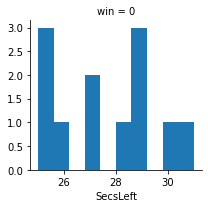

In [10]:
g = sns.FacetGrid(new_take_foul_games, col='win')
g.map(plt.hist, 'SecsLeft')

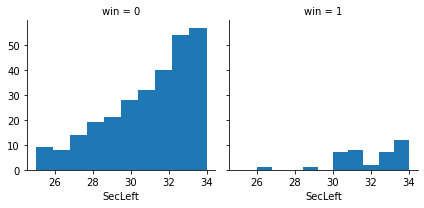

In [11]:
g = sns.FacetGrid(new_no_take_foul, col='win')
g.map(plt.hist, 'SecLeft')

In [64]:
win_counts = new_no_take_foul[new_no_take_foul['win'] == 1]['SecLeft'].value_counts()
win_counts

34    12
31     8
33     7
30     7
32     2
29     1
26     1
Name: SecLeft, dtype: int64

In [65]:
lose_counts = new_no_take_foul[new_no_take_foul['win'] == 0]['SecLeft'].value_counts()
lose_counts

34    57
33    54
32    40
31    32
30    28
29    21
28    19
27    14
25     9
26     8
Name: SecLeft, dtype: int64

In [18]:
len(new_no_take_foul[new_no_take_foul['win'] == 0])

282

As you can see the win percentage seems to rise at about 30 seconds for teams that do not foul. This would lend itself to why teams mostly viewed this 29 second mark as when they fouled.

In [66]:
win_pct = win_counts / (win_counts + lose_counts)
win_pct

25         NaN
26    0.111111
27         NaN
28         NaN
29    0.045455
30    0.200000
31    0.200000
32    0.047619
33    0.114754
34    0.173913
Name: SecLeft, dtype: float64

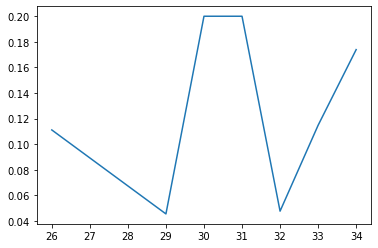

In [67]:
sns.lineplot(x=win_pct.index, y=win_pct.values)

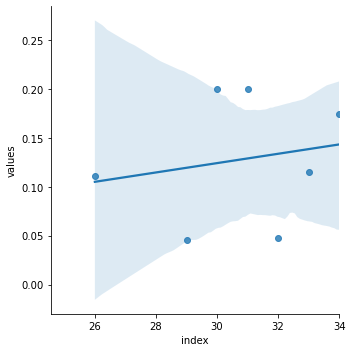

In [68]:
df = pd.DataFrame({'index': win_pct.index, 'values': win_pct.values})
sns.lmplot(x='index', y='values', data=df)

This look below, again on small sample, shows that teams are more likely to foul when trailing by 3 as opposed to 1. It may be that teams feel they need more time and more luck in order to win. This is because if they are trailing by 1 and they give up a score, they still have a chance. This is not the case if a team is trailing by 2 or 3.

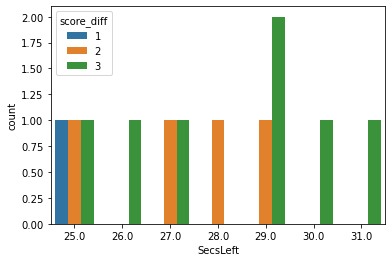

In [34]:
sns.countplot(x='SecsLeft', data=new_take_foul_games, hue='score_diff')

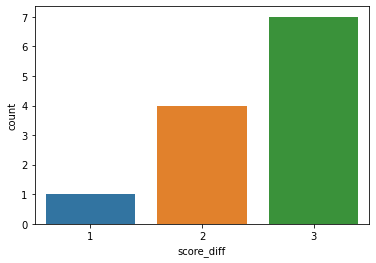

In [33]:
sns.countplot(x='score_diff', data=new_take_foul_games)

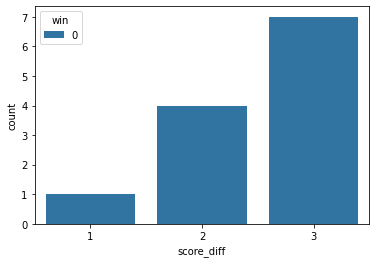

In [37]:
sns.countplot(x='score_diff', data=new_take_foul_games, hue='win')

As you can see, the pattern is all but gone when looking at situations in which the team did not foul. There are more situations in which a team down 1 will wait. The distribution also goes out the full 34 seconds, which contrasts the take foul data set in which no one is willing to foul with over 31 seconds remaining.

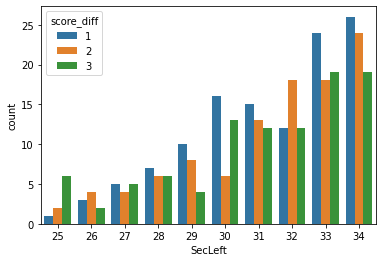

In [35]:
sns.countplot(x='SecLeft', data=new_no_take_foul, hue='score_diff')

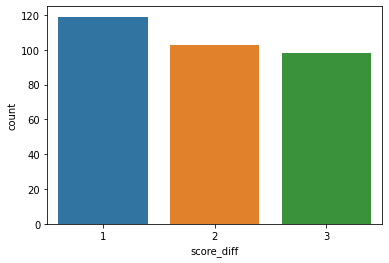

In [36]:
sns.countplot(x='score_diff', data=new_no_take_foul)

Teams are much more likely to win when trailing by only 1 as opposed to 2 or 3. This is intuitive. But it also suggests the situation is not dire enough down 1 to foul.

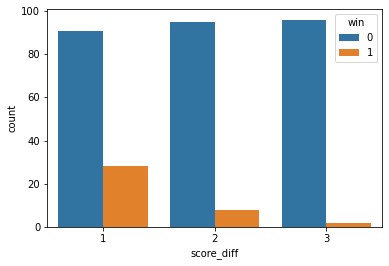

In [38]:
sns.countplot(x='score_diff', data=new_no_take_foul, hue='win')

In [42]:
win_counts2 = new_no_take_foul[new_no_take_foul['win'] == 1]['score_diff'].value_counts()
win_counts2

1    28
2     8
3     2
Name: score_diff, dtype: int64

In [43]:
lose_counts2 = new_no_take_foul[new_no_take_foul['win'] == 0]['score_diff'].value_counts()
lose_counts2

3    96
2    95
1    91
Name: score_diff, dtype: int64

In [69]:
win_pct2 = win_counts2 / (win_counts2 + lose_counts2)
win_pct2

1    0.235294
2    0.077670
3    0.020408
Name: score_diff, dtype: float64

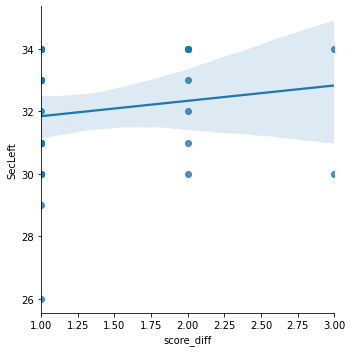

In [70]:
sns.lmplot(x='score_diff', y='SecLeft', data=new_no_take_foul[new_no_take_foul['win'] ==1])

## Fouling While Up Late

Since extensive cleaning was already done, I also decided to repurpose the data to do a little digging into take fouls when a team is up. The dataset will not be perfect as I did not clean it with the intention of using it for this purpose.

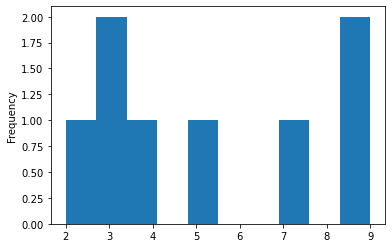

In [59]:
new_winning_take_foul['secs_left'].plot(kind='hist')

The above and below chart shows that teams are mostly fouling up when there is less than five seconds left and they are up at least 3. Situations in which a team fouls when only up 1 or 2 is when they have a foul to give. Any more than five seconds and the effect is minimized as opposing teams can still run a play. Or in the case of a foul up 3, an opposing team can still foul back with enough time to get the ball and shoot again.

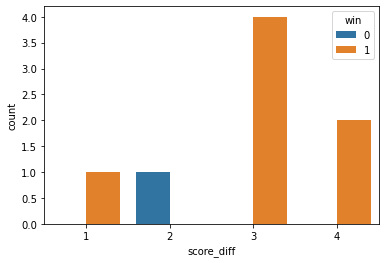

In [60]:
sns.countplot(x='score_diff', data= new_winning_take_foul, hue='win')

Seeing that this is the inverse of the dataset of fouling when down, it makes sense that a large majority of losses come when the opposing team is only down 1. Of course, the sample size of teams that did foul when up 1 with a foul to give is small, but this relatively large losing percentage would suggest that using the foul to give under 5 seconds is a strong strategy. Additionally, if a team is able to foul with under 5 seconds left while up by 3 that also seems to be a smart strategy. While the majority of teams still win without fouling, it seems like a semi-guaranteed win so long as your players are capable of hitting both free throws, which would put you back in the same situation but with less time.

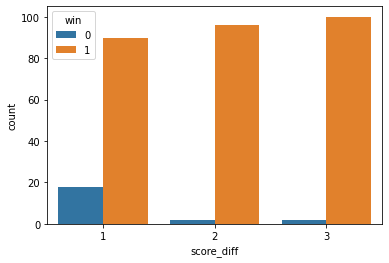

In [61]:
sns.countplot(x='score_diff', data= new_no_win_takefoul, hue='win')

In [62]:
win_counts3 = new_no_win_takefoul[new_no_win_takefoul['win'] == 1]['score_diff'].value_counts()
win_counts3

3    100
2     96
1     90
Name: score_diff, dtype: int64

In [63]:
lose_counts3 = new_no_win_takefoul[new_no_win_takefoul['win'] == 0]['score_diff'].value_counts()
lose_counts3

1    18
3     2
2     2
Name: score_diff, dtype: int64

In [71]:
win_pct3 = win_counts3 / (win_counts3 + lose_counts3)
win_pct3

1    0.833333
2    0.979592
3    0.980392
Name: score_diff, dtype: float64

I was just curious of this small sample size of who the teams were that did do the take foul while up. This strategy has been almost accepted as the correct strategy based on analytics, so it was interesting to see that some of the teams here are the ones we know to have strong investment in analytics. Of course Houston is one of the pioneers of the analytics movement in the last decade, and Atlanta and the Clippers are around the top third in terms of analytics department size according to the link at the bottom of the page.

In [73]:
new_winning_take_foul['WinningTeam'].value_counts()
#Charlotte is actually Toronto since Toronto lost with the strategy

HOU    2
ATL    2
LAC    2
CHO    1
BRK    1
Name: WinningTeam, dtype: int64

https://www.reveliolabs.com/news/business/which-nba-team-is-the-most-data-driven/